### Aula 01 - Fundamentos
#### Utilizaremos python3 e algumas bibliotecas para facilitar carregar, processar, exibir e salvar imagens. Esse código mostra alguns conceitos básicos de python, e das bibliotecas abaixo:

#### `numpy` permite trabalhar com arrays multidimensionais e contém muitas funções prontas para realizar operações de forma otimizada

#### `imageio` contém funções para carregar e salvar de imagens

#### `sys` permite uso de funções do sistema

#### `matplotlib` contém diversas funções e classes para exibição de imagens, gráficos e outros

In [2]:
import numpy as np
import imageio
import sys
import matplotlib.pyplot as plt

Ao utilizar a palavra `as` estamos atribuindo um "alias" à biblioteca, facilitando seu acesso. 
Assim, ao invés de, por exemplo, utilizar o comando abaixo, que gera um vetor com 10 elementos, todos com valor zero (0)

`A = numpy.zeros(10)`

Podemos simplesmente usar:

In [3]:
A = np.zeros(10)

In [4]:
print(A)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Abaixo, utilizarei a entrada (via teclado) para ler nomes de duas imagens a serem carregadas. Para isso uso a função: `input()` e então converto o conteúdo explicitamente para `string`:

In [8]:
filename1 = str(input())
filename2 = str(input())

img1 = imageio.imread(filename1)
img2 = imageio.imread(filename2)

numeros1.png
numeros2.png


Os objetos `img1` e `img2` são do typo `numpy array`, e por isso podemos processá-los como tal. A forma mais simples seria por exemplo percorrer todos os pixels de forma explícita usando dois laços, por exemplo para subtrair uma imagem da outra. Primeiro extraímos o tamanho das imagens

In [9]:
size1 = img1.shape
size2 = img2.shape
assert size1 == size2

E a seguir, criamos uma nova imagem, tipo float (para evitar overflow) e percorremos todos os pixels, subtraindo:

In [31]:
imgout = np.zeros(size1, dtype=float)

for x in range(size1[0]):
    for y in range(size1[1]):
        imgout[x,y] = float(img1[x,y]) - float(img2[x,y])
        

Para exibir usamos a `matplotlib`. Aqui uso a opção inline apenas para exibição no Notebook, mas isso não é necessário caso não esteja utilizando Jupyter.

In [32]:
%matplotlib inline

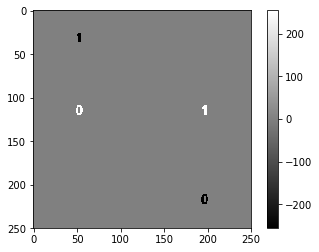

In [34]:
plt.imshow(imgout, cmap='gray')
plt.colorbar()

OBS: Para exibição em uma janela comum em python ou ipython, use: `plt.show()`

In [35]:
np.min(imgout)

-255.0

In [36]:
np.max(imgout)

255.0

Os valores mínimo e máximo de imgout são -255 e 255. Devemos normalizar para 0-255 para armazenar, pois os formatos mais comuns usam 8 bits por pixel. Agora não irei percorrer todos os pixels usando laços, mas sim processando diretamente com os operadores de subtração, divisão, etc.

In [37]:
imax = np.max(imgout)
imin = np.min(imgout)
imgout_norm = (imgout - imin)/(imax-imin)

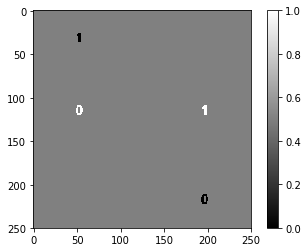

In [38]:
plt.imshow(imgout_norm, cmap="gray")
plt.colorbar()

A nova imagem tem valores entre 0 e 1, podemos então multiplicar por 255 e converter para `uint8`

In [40]:
imgout_norm = (imgout_norm*255).astype(np.uint8)

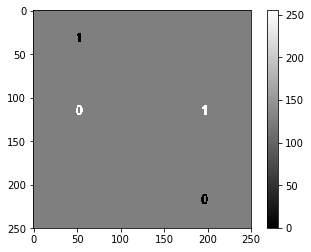

In [41]:
plt.imshow(imgout_norm, cmap="gray")
plt.colorbar()

In [ ]:
Finalmente, 